In [116]:
#importing necessary packages
import pandas as pd
import requests
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import numpy as np
%matplotlib inline

#### Data wrangling is the process of cleaning data and making the data functionally fit for exploratory data analysis. It involves four steps: Gathering , Asessing, Cleaning and Storing Data(optional). We'll go through these steps one by one in this project

### 1. Gathering Data: This step is used to gather data that is required for the analysis. Data can be gathered through various methods. These methods involve:
<li> Downloading data directly via webisites </li>
<li> Downloading data programmatically using HTTP protocol </li>
<li> Accessing data using APIs(Application Programming Interface) </li>

In [2]:
#data folder name in the project directory
data_folder_name = r'data'

#### The following file was directly downloaded from the udacity website. This is a case of *Data Gathering: Downloading data directly via websites*

In [3]:
df_basic = pd.read_csv(data_folder_name+r'\twitter-archive-enhanced-2.csv')

#### In the following, we'll request the data via requests lib. We'll then save the retrieved contents to a file. This is a case of *Data Gathering: Downloading data via Internet through HTTP protocol

In [4]:
dog_predictions_file_name = r'dog_predictions'
if not os.path.exists(os.path.join(data_folder_name, dog_predictions_file_name)):
    print('not exists')
    dog_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
    with open(os.path.join(data_folder_name, dog_predictions_file_name), mode='wb') as file:
        file.write(dog_predictions.content)

In [5]:
df_predictions = pd.read_csv(os.path.join(data_folder_name, dog_predictions_file_name), sep='\t', encoding='utf-8')

#### In the following, we'll access "@WeRateDogs" twitter archive and store to a file. This is a case of *Data Gathering: via APIs*

In [6]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
tweets_id = [str(each) for each in df_basic.tweet_id]

In [8]:
import timeit
tweets_json_data_file_name = r'tweet_json.txt'
errors = []
tweets_count = 0
if not os.path.exists(os.path.join(data_folder_name, tweets_json_data_file_name)):
    #os.mkdir(os.path.join(data_folder_name, tweets_json_data_file_name))
    with open(os.path.join(data_folder_name, tweets_json_data_file_name), 'w') as outfile:
        start_time = timeit.timeit()
        for index, each_tweet_id in enumerate(tweets_id):
            try:
                tweet_data = api.get_status(each_tweet_id, tweet_mode='extended', wait_on_rate_limit=True,\
                                           wait_on_rate_limit_notify=True)
                json.dump(tweet_data._json, outfile)
                outfile.write('\n')
            except:
                errors.append(each_tweet_id)
                continue
            print('tweet count is', index)
        end_time = timeit.timeit()
    print(end_time - start_time)

In [9]:
#reading each line in the tweet_json.txt as json object using the panda's read_json object
tweet_additional_data = pd.read_json(os.path.join(data_folder_name, tweets_json_data_file_name), lines=True)

In [10]:
#extracting only the required  fields such as id, retweet_count and favorite_count
df_additional = tweet_additional_data[['id', 'retweet_count', 'favorite_count']]

### 2. Assessing data: In this step, observations are made about the data after the data is assessed visually and programmatically

#### Visual Assessment: The intention of visual assessment is to acquaint oneself with the data in its entirety

In [11]:
df_basic

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


> <b> About the data: </b>
<ol>
    <li>There are 2357 rows and 17 columns</li>
    <li>"tweet_id" is the id of ofthe tweet</li>
    <li>"in_reply_to_status_id" is the id of the status being replied to</li>
    <li>"in_reply_to_user_id" is the id of the user being replied to</li>
    <li>"timestamp" is the time at which the tweet was posted</li>
    <li>"source" tells the source of the tweet whether the tweet was posted using android, iphone or web</li>
    <li>"text" field has the contents of the tweet</li>
    <li>"retweeted_status_id" field contains of the id of the original tweet that is retweeted</li>
    <li>"retweeted_status_user_id" feild contains the id of the user of the original post</li>
    <li>"retweeted_status_timestamp" contains the timestamp of the original tweet</li>
    <li>"expanded_urls" contains urls to the original post</li>
    <li>"name" contains the name of the dog</li>
    <li>"doggo", "floofer", "pupper", "puppo" are various stages of a dog</li>
</ol>

In [12]:
df_additional

,id,retweet_count,favorite_count
0,892420643555336193,7271,34723
1,892177421306343426,5440,30102
2,891815181378084864,3585,22657
3,891689557279858688,7464,37989
4,891327558926688256,8025,36265
...,...,...,...
2325,666049248165822465,37,92
2326,666044226329800704,120,255
2327,666033412701032449,38,105
2328,666029285002620928,41,117


> <b> About the data: </b>
<ol>
    <li>There are 2331 rows and 3 columns</li>
    <li>"id" is the id of ofthe tweet</li>
    <li>"retweet_count" is the count of that tweet being retweeted</li>
    <li>"favorite_count" is the number of likes for that particular tweet</li>
</ol>

In [13]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


> <b> About the data: </b>
<ol>
    <li>There are 2076 rows and 12 columns</li>
    <li>"tweet_id" is the id of ofthe tweet</li>
    <li>"jpg_url" is the url for the image of the dog being predicted</li>
    <li>"img_num" corresponds to the image number which the prediction is most confident of</li>
    <li>"p1" is the algorithm's #1 prediction for the image in the tweet</li>
    <li>"p1_conf" is how confident the algorithm is in its #1 prediction </li>
    <li>"p1_dog" is whether or not the #1 prediction is a breed of dog</li>
    <li>etc..</li>
</ol>

#### Programmatic Assessment: Using code to do anything other than look at the data in its entirety.

In [14]:
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
df_basic.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


from the above table, we could see that outliers exist in both numerator and denominator columns. 

In [16]:
#check for duplicates
df_basic.duplicated().sum()

0

In [17]:
df_basic.rating_numerator.value_counts().sort_values(ascending=False)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
75        2
420       2
0         2
15        2
144       1
666       1
44        1
960       1
1776      1
88        1
84        1
80        1
60        1
50        1
143       1
26        1
24        1
17        1
27        1
45        1
20        1
99        1
121       1
204       1
182       1
165       1
Name: rating_numerator, dtype: int64

In [18]:
df_basic.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [19]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [20]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


We could observe from above that the mean for confidence for second and third predictions are in single digits. First prediction has more confidence.

In [21]:
#checking for duplicates
df_predictions.duplicated().sum()

0

In [22]:
df_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2330 non-null   int64
 1   retweet_count   2330 non-null   int64
 2   favorite_count  2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


Since there are outputs from twitter, let us not touch these data

In [23]:
df_additional.describe()

,id,retweet_count,favorite_count
count,2.330000e+03,2330.000000,2330.000000
mean,7.419011e+17,2562.769528,7256.214592
std,6.824557e+16,4333.696600,11266.972937
min,6.660209e+17,1.000000,0.000000
25%,6.782612e+17,519.250000,1260.000000
50%,7.182408e+17,1195.000000,3140.000000
75%,7.986712e+17,2971.500000,8864.500000
max,8.924206e+17,73423.000000,149140.000000


In [24]:
#checking for duplicates
df_additional.duplicated().sum()

0

<b> Quality Issues: </b>
<br>
<br>
<b>df_basic_dataset: </b>
<br>
<ol>
    <li>"retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" have 181 non-null values which means there are 181 retweets in the data</li>
    <li>"in_reply_to_status_id" and "in_reply_to_user_id" fields have 78 non-null values which means there are 78 reply tweets in the data</li>
    <li>"timestamp" is of 'str' data type and +0000 is common to all</li>
    <li>"tweet_id" must be of string data type</li>
    <li>"ratings_numerator" contains extreme values such as 960, 1776</li>
    <li>"ratings_denominator" contains values above ten</li>
    
</ol>
<br>
<b>df_predictions: </b>
<br>
<ol>
    <li>names of dog breeds not in uniform standard. Some starts with lower case letters and others upper case letters.</li>
    <li>has three predictions for each image</li>
    <li>invalid predictions</li>
</ol>
<br>
<b>df_additional: </b>
<br>
<ol>
    <li>the number of rows in df_additional is less than the df_basic, which means that certain tweets has either been removed or made unavailable for view</li>
    <li>column name is "id" which is id of the tweet. Whereas in df_basics and df_predictions, this column name is "tweet_id"</li>
</ol>
<br>
   

<b>Tidiness Issues: </b>
<br>
<br>
<b>df_basic_dataset: </b>
<br>
<ol>
    <li>"doggo", "floofer", "pupper", "puppo" fields are various stages of a dog in different columns </li>
</ol>
<br>
<b>df_additional: </b>
<br>
<ol>
    <li>the fields "retweet_count" and "favorite_count" are attributes of tweet but in a seperate table</li>
</ol>
<br>
<b>df_predictions: </b>
<br>
<ol>
    <li>the prediction is about the dog in the tweet but in a seperate table</li>
</ol>
<br>
   

### 3. Cleaning data: This step is intended to clean the data programmatically. Programmatics cleaning involves three steps:
<ol>
    <li>Define what needs to be done to clean the code. This is similar to a pesudocode</li>
    <li>Code accordingly to the definition</li>
    <li>Test the code for its functionality</li>
</ol>

In [25]:
#making copies of the original dataframes for cleaning process
df_basic_clean = df_basic.copy()
df_additional_clean = df_additional.copy()
df_predictions_clean = df_predictions.copy()

#### Define: Drop the retweeted tweets from the df_basic_clean using drop()

#### Code

In [26]:
df_basic_clean = df_basic_clean[df_basic_clean.retweeted_status_id.isnull()]

#### Test

In [27]:
#all 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' must all contain only null values
#no of entries must be 2356-181 = 2175 entries
df_basic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Define: Drop the replied tweets from the df_basic_clean using drop()

#### Code

In [28]:
df_basic_clean = df_basic_clean[df_basic_clean.in_reply_to_status_id.isnull()]

#### Test

In [29]:
# in_reply_to_status_id and in_reply_to_user_id must not contain must contain 0 non-null object
df_basic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Define: Extract the stage of the data using the text

#### Code

In [30]:
#extract dog stage from text from 
df_basic_clean['pupper'] = df_basic_clean.text.str.extract('([Pp]upper)')
df_basic_clean['puppo'] = df_basic_clean.text.str.extract('([Pp]uppo)')
df_basic_clean['floofer'] = df_basic_clean.text.str.extract('([Ff]loofer)')
df_basic_clean['doggo'] = df_basic_clean.text.str.extract('([Dd]oggo)')
df_basic_clean['blep'] = df_basic_clean.text.str.extract('([Bb]lep)')

In [31]:
df_basic_clean.doggo = df_basic_clean.doggo.str.lower()
df_basic_clean.puppo = df_basic_clean.puppo.str.lower()
df_basic_clean.floofer = df_basic_clean.floofer.str.lower()
df_basic_clean.pupper = df_basic_clean.pupper.str.lower()
df_basic_clean.blep = df_basic_clean.blep.str.lower()

#### Test

In [32]:
#the 'doggo', 'floofer', 'pupper', 'puppo', 'blep' must contain only values such as nan,
#'doggo', 'floofer', 'pupper', 'puppo', 'blep'
df_basic_clean.doggo.value_counts()

doggo    90
Name: doggo, dtype: int64

In [33]:
df_basic_clean.puppo.value_counts()

puppo    30
Name: puppo, dtype: int64

In [34]:
df_basic_clean.floofer.value_counts()

floofer    10
Name: floofer, dtype: int64

In [35]:
df_basic_clean.pupper.value_counts()

pupper    252
Name: pupper, dtype: int64

In [36]:
df_basic_clean.blep.value_counts()

blep    4
Name: blep, dtype: int64

In [37]:
df_basic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       90 no

#### The above cleaning process also seems to have solved the issue <i>"doggo", "floofer", "pupper", "puppo" fields are almost none for all entries but these none values are not being counted as null objects by pandas</i>

#### Define: Convert timestamp variable in df_basic_clean to datetime type from str type and remove the last +0000

#### Code

In [38]:
(df_basic_clean.timestamp.str[-5:] == '+0000').sum()

2097

In [39]:
df_basic_clean.timestamp = df_basic_clean.timestamp.str[:-5]

In [40]:
(df_basic_clean.timestamp.str[-5:] == '+0000').sum()

0

In [41]:
#to datetime
df_basic_clean.timestamp = pd.to_datetime(df_basic_clean.timestamp)

#### Test

In [42]:
df_basic_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2097, dtype: datetime64[ns]

In [44]:
#should be a Timestamp type
type(df_basic_clean.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Define: Drop entries that contain denominator value not equal to 10 since we can understand from the .describe() statistics, 90% of the denominator values has 10 as its value.

#### Code

In [45]:
df_basic_clean.rating_denominator.value_counts()

10     2080
50        3
80        2
11        2
2         1
20        1
40        1
70        1
90        1
110       1
120       1
150       1
170       1
7         1
Name: rating_denominator, dtype: int64

In [46]:
#just rechecking if there was any wrong extraction. The below values must match the above
#if there was no wrong extraction in values
df_basic_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)[1].value_counts()

10     2080
50        3
11        2
80        2
120       1
170       1
7         1
150       1
70        1
90        1
110       1
2         1
20        1
40        1
Name: 1, dtype: int64

In [47]:
#dropping entries with denominator values not equal to 10
df_basic_clean = df_basic_clean[df_basic_clean['rating_denominator'] == 10]

#### Test

In [48]:
#the denominator field should contain 2080 entries of value 10 only
df_basic_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

#### Define: Re-extract ratings_numerator values from the text field

#### Code

In [49]:
df_basic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2080 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2080 non-null   datetime64[ns]
 4   source                      2080 non-null   object        
 5   text                        2080 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2077 non-null   object        
 10  rating_numerator            2080 non-null   int64         
 11  rating_denominator          2080 non-null   int64       

In [50]:
#re-extracting rating_numerator value from the text field
df_basic_clean['rating_numerator'] = df_basic_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)[0].astype(float)

In [51]:
df_basic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2080 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2080 non-null   datetime64[ns]
 4   source                      2080 non-null   object        
 5   text                        2080 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2077 non-null   object        
 10  rating_numerator            2080 non-null   float64       
 11  rating_denominator          2080 non-null   int64       

In [52]:
df_basic_clean.rating_numerator.value_counts()

12.00      486
10.00      436
11.00      413
13.00      287
9.00       152
8.00        98
7.00        51
14.00       38
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
420.00       1
0.00         1
1776.00      1
13.50        1
11.26        1
9.75         1
11.27        1
Name: rating_numerator, dtype: int64

From the above, we could see that most of the values lie below 15, hence we could remove the outliers that lie above 15

In [53]:
(df_basic_clean['rating_numerator'] > 15).sum()

2

In [54]:
#dropping the 2 entries that have rating_numerator > 15
df_basic_clean = df_basic_clean[df_basic_clean['rating_numerator'] <= 15]

#### Test

In [55]:
#output should be 0 entries
df_basic_clean.query('rating_numerator > 15')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,blep


#### Define: Convert 'tweet_id' datatype to string in all three data frames

#### Code

In [56]:
df_basic_clean.tweet_id = df_basic_clean.tweet_id.astype(str)

In [57]:
df_predictions_clean.tweet_id = df_predictions_clean.tweet_id.astype(str)

In [58]:
df_additional_clean.id = df_additional_clean.id.astype(str)

#### Test

In [59]:
type(df_basic_clean.tweet_id.iloc[0])

str

In [60]:
 type(df_additional_clean.id.iloc[0])

str

In [61]:
type(df_predictions_clean.tweet_id.iloc[0])

str

#### Define: melt all these columns into a single column containing values such as "doggo", "floofer", "pupper", "puppo", "blep" and nan

In [62]:
#convert all nan values to ""
df_basic_clean.doggo.fillna('', inplace=True)
df_basic_clean.floofer.fillna('', inplace=True)
df_basic_clean.pupper.fillna('', inplace=True)
df_basic_clean.puppo.fillna('', inplace=True)
df_basic_clean.blep.fillna('', inplace=True)

In [63]:
#create a new column by concatenating all these fields
df_basic_clean['dog_stage'] = df_basic_clean.doggo + df_basic_clean.floofer + df_basic_clean.pupper + df_basic_clean.puppo\
                                    + df_basic_clean.blep

In [64]:
#some dogs belong to multiple categories. Replacing with modified value for better readability
df_basic_clean.loc[df_basic_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_basic_clean.loc[df_basic_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_basic_clean.loc[df_basic_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
df_basic_clean.loc[df_basic_clean.dog_stage == 'pupperblep', 'dog_stage'] = 'pupper, blep'

In [65]:
#drop columns "doggo", "floofer", "pupper", "puppo", "blep"
df_basic_clean.drop(["doggo", "floofer", "pupper", "puppo", "blep"], axis=1, inplace=True)

#### Test

In [66]:
#the columns "doggo", "floofer", "pupper", "puppo", "blep" must not be present
df_basic_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [67]:
#dog_stage column must only have "doggo", "floofer", "pupper", "puppo", "blep", "doggo, pupper", "doggo, puppo",
#"doggo, floofer" and "pupper, blep"
df_basic_clean.dog_stage.value_counts()

                  1711
pupper             237
doggo               77
puppo               28
floofer              9
doggo, pupper        9
blep                 3
doggo, puppo         2
doggo, floofer       1
pupper, blep         1
Name: dog_stage, dtype: int64

In [68]:
df_basic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2078 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2078 non-null   datetime64[ns]
 4   source                      2078 non-null   object        
 5   text                        2078 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2075 non-null   object        
 10  rating_numerator            2078 non-null   float64       
 11  rating_denominator          2078 non-null   int64       

#### Define: Convert all dog breed predicted names to lower_case

#### Code

In [69]:
#convert p1, p2, p3 to lower case
df_predictions_clean.p1 = df_predictions_clean.p1.str.lower()
df_predictions_clean.p2 = df_predictions_clean.p2.str.lower()
df_predictions_clean.p3 = df_predictions_clean.p3.str.lower()
df_predictions_clean.p1 = df_predictions_clean.p1.str.replace('-','_')
df_predictions_clean.p2 = df_predictions_clean.p2.str.replace('-','_')
df_predictions_clean.p3 = df_predictions_clean.p3.str.replace('-','_')
df_predictions_clean.p1 = df_predictions_clean.p1.str.replace(' ','_')
df_predictions_clean.p2 = df_predictions_clean.p2.str.replace(' ','_')
df_predictions_clean.p3 = df_predictions_clean.p3.str.replace(' ','_')

#### Test

In [70]:
#all the dog breed names must be in lower case
df_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
292,671186162933985280,https://pbs.twimg.com/media/CVCIQX7UkAEzqh_.jpg,1,chihuahua,0.319106,True,whippet,0.169134,True,toy_terrier,0.125815,True
279,671109016219725825,https://pbs.twimg.com/media/CVBCFkyU4AE2Wcr.jpg,1,basenji,0.855959,True,beagle,0.036723,True,toy_terrier,0.029258,True
1722,819711362133872643,https://pbs.twimg.com/media/C2AzHjQWQAApuhf.jpg,2,acorn_squash,0.848704,False,toilet_seat,0.044348,False,toy_poodle,0.022009,True
1590,798644042770751489,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,english_springer,0.403698,True,brittany_spaniel,0.347609,True,welsh_springer_spaniel,0.137186,True
977,707038192327901184,https://pbs.twimg.com/media/Cc_ney1W4AANuY3.jpg,1,pug,0.642426,True,llama,0.057306,False,french_bulldog,0.054186,True


#### Define: Derive one column that contains the best dog prediction

#### Code

In [71]:
#ensure that indeces are in order since the following step is postion based operation
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 111.5+ KB


In [72]:
best_prediction = []
for i in range(len(df_predictions_clean)):
    if df_predictions_clean['p1_dog'].iloc[i]:
        best_prediction.append(df_predictions_clean['p1'].iloc[i])
    elif df_predictions_clean['p2_dog'].iloc[i]:
        best_prediction.append(df_predictions_clean['p2'].iloc[i])
    elif df_predictions_clean['p3_dog'].iloc[i]:
        best_prediction.append(df_predictions_clean['p3'].iloc[i])
    else:
        best_prediction.append('no_prediction')
        

In [73]:
df_predictions_clean['best_prediction'] = pd.Series(best_prediction)

#### Test

In [74]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2075 non-null   object 
 1   jpg_url          2075 non-null   object 
 2   img_num          2075 non-null   int64  
 3   p1               2075 non-null   object 
 4   p1_conf          2075 non-null   float64
 5   p1_dog           2075 non-null   bool   
 6   p2               2075 non-null   object 
 7   p2_conf          2075 non-null   float64
 8   p2_dog           2075 non-null   bool   
 9   p3               2075 non-null   object 
 10  p3_conf          2075 non-null   float64
 11  p3_dog           2075 non-null   bool   
 12  best_prediction  2075 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 119.6+ KB


In [75]:
df_predictions_clean.best_prediction.value_counts()

no_prediction         324
golden_retriever      173
labrador_retriever    113
pembroke               96
chihuahua              95
                     ... 
entlebucher             1
standard_schnauzer      1
silky_terrier           1
clumber                 1
japanese_spaniel        1
Name: best_prediction, Length: 114, dtype: int64

#### Define: Rename column name 'id' as 'tweet_id'

#### Code

In [76]:
df_additional_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [77]:
# column name must be tweet_id
df_additional_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [78]:
df_additional_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2330 non-null   object
 1   retweet_count   2330 non-null   int64 
 2   favorite_count  2330 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 45.6+ KB


#### Define: 
<li>Join two data frames df_basic_clean and df_additional_clean</li>
<li>additonal_df has less entries than base_data_df as some tweets have been removed or so. Hence perform a right join</li>
<li>Join the best_prediction column of df_predictions with the master df</li>

#### Code

In [79]:
df_additional_clean.sample(5)

,tweet_id,retweet_count,favorite_count
2300,666411507551481857,280,385
747,777684233540206592,2816,10919
619,793286476301799424,8903,24041
314,833722901757046785,3097,20197
1708,679736210798047232,743,1984


In [95]:
#Creating a master data frame - df_tweet_data by joining the three data frames
#First joining df_basic and df_additional
df_tweet_data = pd.merge(df_basic_clean, df_additional_clean, on='tweet_id', how='left')

In [96]:
#testing the master dataframe
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2077
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2078 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2078 non-null   datetime64[ns]
 4   source                      2078 non-null   object        
 5   text                        2078 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2075 non-null   object        
 10  rating_numerator            2078 non-null   float64       
 11  rating_denominator          2078 non-null   int64       

In [97]:
#drop entries in master frame- df_tweet_data where retweet_count has null values
df_tweet_data = df_tweet_data[df_tweet_data.retweet_count.notnull()]

In [98]:
#test that the master frame- df_tweet_data has only 2071 entries
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2077
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2071 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2071 non-null   datetime64[ns]
 4   source                      2071 non-null   object        
 5   text                        2071 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2068 non-null   object        
 10  rating_numerator            2071 non-null   float64       
 11  rating_denominator          2071 non-null   int64       

In [99]:
#just reviewing df_predictions
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2075 non-null   object 
 1   jpg_url          2075 non-null   object 
 2   img_num          2075 non-null   int64  
 3   p1               2075 non-null   object 
 4   p1_conf          2075 non-null   float64
 5   p1_dog           2075 non-null   bool   
 6   p2               2075 non-null   object 
 7   p2_conf          2075 non-null   float64
 8   p2_dog           2075 non-null   bool   
 9   p3               2075 non-null   object 
 10  p3_conf          2075 non-null   float64
 11  p3_dog           2075 non-null   bool   
 12  best_prediction  2075 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 119.6+ KB


In [100]:
#creating a temp data frame from predictions_clean containing the best prediction and then joining it with master_df
temp_df = df_predictions_clean[['tweet_id', 'best_prediction']]

In [101]:
#testing - must contain 2075 entries as above
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2075 non-null   object
 1   best_prediction  2075 non-null   object
dtypes: object(2)
memory usage: 16.3+ KB


In [102]:
#joining the temporary data with the master dataframe
df_tweet_data = pd.merge(df_tweet_data, temp_df, on='tweet_id', how='left')

#### Test

In [103]:
df_tweet_data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,best_prediction
557,781251288990355457,NaN,NaN,2016-09-28 21:56:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He just got yelled at for goin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781251288...,11.0,10,Oakley,,1998.0,8181.0,mexican_hairless
355,817423860136083457,NaN,NaN,2017-01-06 17:33:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Ken. His cheeks are magic. 13/10 (IG: ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817423860...,13.0,10,Ken,,14113.0,32854.0,samoyed
390,812709060537683968,NaN,NaN,2016-12-24 17:18:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandi and Harley. They are practicing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812709060...,12.0,10,Brandi,,1396.0,6477.0,irish_setter
227,838476387338051585,NaN,NaN,2017-03-05 19:48:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Somehow he heard you tell him...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838476387...,13.0,10,Stanley,,4503.0,21601.0,great_pyrenees
607,772877495989305348,NaN,NaN,2016-09-05 19:22:09,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",You need to watch these two doggos argue throu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772877495...,11.0,10,None,doggo,3712.0,8304.0,norwegian_elkhound


In [104]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2070
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2071 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2071 non-null   datetime64[ns]
 4   source                      2071 non-null   object        
 5   text                        2071 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2068 non-null   object        
 10  rating_numerator            2071 non-null   float64       
 11  rating_denominator          2071 non-null   int64       

#### Define: Since our analysis involve dog_breed, let us drop the rows where best_prediction is null

#### Code

In [105]:
#drop entries in master-data frame where best_prediction is null
df_tweet_data = df_tweet_data[df_tweet_data['best_prediction'].notnull()]

#### Test

In [106]:
#the master dataframe must contain 1945 entries
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 2070
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1945 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   1945 non-null   datetime64[ns]
 4   source                      1945 non-null   object        
 5   text                        1945 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1945 non-null   object        
 10  rating_numerator            1945 non-null   float64       
 11  rating_denominator          1945 non-null   int64       

### Storing

In [107]:
df_tweet_data.to_csv(r'data/twitter_archive_master.csv', index=False)

In [108]:
df_basic_clean.to_csv(r'data/twitter_basic_cleaned.csv', index=False)

In [109]:
df_additional_clean.to_csv(r'data/twitter_additional_cleaned.csv', index=False)

In [110]:
df_predictions_clean.to_csv(r'data/predictions_clean.csv', index=True)

#### Testing

In [159]:
#testing
test_df = pd.read_csv(r'data/twitter_archive_master.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1945 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1945 non-null   object 
 4   source                      1945 non-null   object 
 5   text                        1945 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      float64
 9   expanded_urls               1945 non-null   object 
 10  rating_numerator            1945 non-null   float64
 11  rating_denominator          1945 non-null   int64  
 12  name                        1945 non-null   object 
 13  dog_stage                   331 n

## EDA - Exploratory Data Analysis

In [160]:
#load the twitter_data data frame
df = pd.read_csv(r'data/twitter_archive_master.csv', parse_dates=['timestamp'])

## Insight 1

### Is there any correlation between retweet count and favorite count?

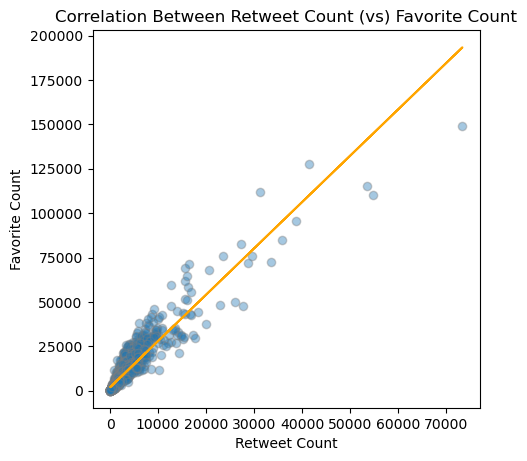

In [161]:
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(df.retweet_count, df.favorite_count, cmap="plasma", alpha=0.4, edgecolors="grey")
slope, intercept = np.polyfit(df.retweet_count, df.favorite_count, 1)
plt.plot(df.retweet_count, slope*df.retweet_count + intercept, color='orange')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Correlation Between Retweet Count (vs) Favorite Count');

<ol>
    <li>The above correlation plot shows that there exists a strong postive correlation between retweet_count and favorite_count for each tweet </li>
    <li>This means that when retweet_count increases, favorite_count also increases and vis-a-vis</li>
    <li>This is only a correlation and not causation</li>
</ol>

## Insight 2

### Which tweets has had the most likes?

In [162]:
top_10_liked = df.sort_values('favorite_count', ascending=False)[:10]

In [163]:
most_liked_tweet = top_10_values.iloc[0]

In [164]:
most_liked_tweet

tweet_id                                                     744234799360020481
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2016-06-18 18:26:18
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here's a doggo realizing you can stand in a po...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                           13.0
rating_denominator                                                           10
name                                    

On the looking at the corresponding twitter link: https://twitter.com/dog_rates/status/744234799360020481
<ol>
    <li>We could see that,it has 149K likes</li>
    <li>It has 73.4K retweets which is amazing</li>
</ol>

## Insight 3

### How has the tweets at @WeRateDogs account has been over the years?

In [177]:
#create a new column named year using the timestamp column
df['year'] = df['timestamp'].dt.year

In [175]:
#test for various columns-- timestamp column and year column must match
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,best_prediction,year,month
1286,683391852557561860,NaN,NaN,2016-01-02 20:58:09,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Jack (pronounced ""Kevin""). He's a...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683391852...,11.0,10,Jack,NaN,2263.0,7283.0,french_bulldog,2016,1
629,761292947749015552,NaN,NaN,2016-08-04 20:09:17,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bonaparte. He's pupset because it's cloud...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761292947...,11.0,10,Bonaparte,NaN,1043.0,4332.0,standard_poodle,2016,8
152,853760880890318849,NaN,NaN,2017-04-17 00:03:50,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Alice. I'm told she enjoys car ri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853760880...,12.0,10,Alice,NaN,5318.0,26846.0,miniature_pinscher,2017,4
1207,688519176466644993,NaN,NaN,2016-01-17 00:32:18,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is sprouting a flower out of her h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688519176...,12.0,10,None,pupper,690.0,2221.0,pembroke,2016,1
144,856282028240666624,NaN,NaN,2017-04-23 23:01:59,"<a href=""http://twitter.com/download/iphone"" r...","This is Cermet, Paesh, and Morple. They are ab...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856282028...,14.0,10,Cermet,NaN,5772.0,25947.0,chihuahua,2017,4


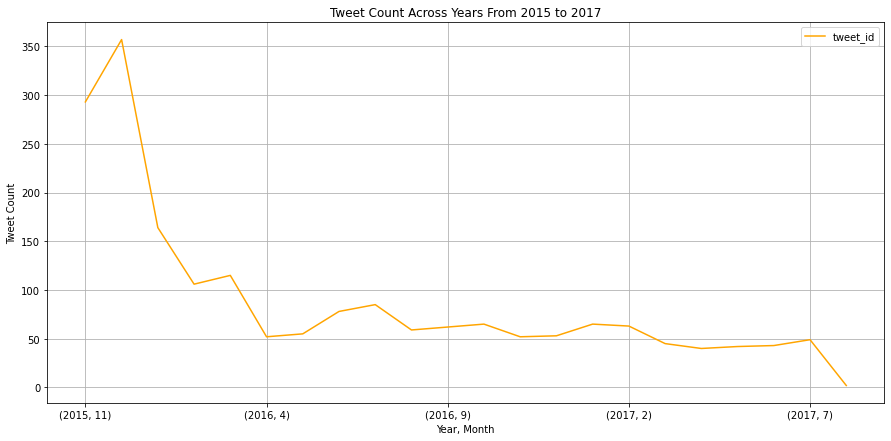

In [194]:
df.groupby(['year', 'month'])['tweet_id'].count().plot(kind='line', figsize=(15,7), color='orange');
plt.grid()
plt.xlabel('Year, Month')
plt.ylabel('Tweet Count')
plt.legend()
plt.title('Tweet Count Across Years From 2015 to 2017');

From the above line graph, in the available data, we could see that, @WeRateDogs twitter account:
<ol>
    <li>has posted the most number of dog_ratings around the 2015 Year end and early 2016</li>
    <li>After mid 2016, there has been a deacrease in the tweets</li>
</ol>

## Insight 4

### Which breed has been most popular?

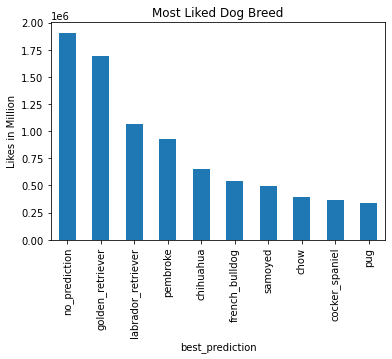

In [224]:
df.groupby('best_prediction')['favorite_count'].sum().sort_values(ascending=False)[:10].plot(kind='bar', figsize=(6,4))
plt.title('Most Liked Dog Breed')
plt.ylabel('Likes in Million');


From the above bar graph, we could see that:
<ol>
    <li>"no_predictions" indicate tweets that predicting models couldn't predict as dogs</li>
    <li>Apart from "no_predictions" golden_retriever is the most liked dog breed</li>
    <li>labrador_retriever stands next and so on</li>
</ol>